In [22]:
import pandas as pd
import re
import string
from transformers import pipeline
from tqdm import tqdm
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [23]:
hanifnoerr = "hanifnoerr/Fine-tuned-Indonesian-Sentiment-Classifier"
hanifnoerr_model = pipeline(
    "sentiment-analysis",
    model=hanifnoerr,
    tokenizer=hanifnoerr,
    truncation=True,
     max_length=512
)

crypter70 = "crypter70/IndoBERT-Sentiment-Analysis"
crypter70_model = pipeline(
    "sentiment-analysis",
    model=crypter70,
    tokenizer=crypter70,
    truncation=True,
     max_length=512
)

w11wo = "w11wo/indonesian-roberta-base-sentiment-classifier"
w11wo_model = pipeline(
    "sentiment-analysis",
    model=w11wo,
    tokenizer=w11wo,
    truncation=True,
     max_length=512
)

Device set to use cpu
Device set to use cpu
Device set to use cpu


CLEANING

In [24]:
data = pd.read_excel("Review KCU Pulau Jawa.xlsx")
data = data.dropna(subset=['review_text'])

data['review_text_cleaned'] = data['review_text'].astype(str).str.lower()
data['review_text_cleaned'] = [re.sub(r'[^\x00-\x7f]',r'', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = [re.sub(r'\n', r' ', i) for i in data['review_text_cleaned']]
data['review_text_cleaned'] = data['review_text_cleaned'].apply(
    lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x)
)
# Normalize whitespace and trim
data['review_text_cleaned'] = data['review_text_cleaned'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Drop rows where cleaned text is empty string
data = data[data['review_text_cleaned'] != ""]

In [25]:
words_dict = {
    'tdk'  : 'tidak',
    'yg' : 'yang',
    'ga' : 'tidak',
    'gak' : 'tidak',
    'tp' : 'tapi',
    'd' : 'di',
    'sy' : 'saya',
    '&' : 'dan',
    'dgn' : 'dengan', 
    'utk' : 'untuk',
    'gk' : 'tidak',
    'jd' : 'jadi',
    'jg' : 'juga',
    'dr' : 'dari',
    'krn' : 'karena',
    'aja' : 'saja',
    'karna' : 'karena',
    'udah' : 'sudah',
    'kmr' : 'kamar',
    'g' : 'tidak',
    'dpt' : 'dapat',
    'banget' : 'sekali',
    'bgt' : 'sekali',
    'kalo' : 'kalau',
    'n' : 'dan', 
    'bs' : 'bisa',
    'oke' : 'ok',
    'dg' : 'dengan',
    'pake' : 'pakai',
    'sampe' : 'sampai',
    'dapet' : 'dapat',
    'ad' : 'ada',
    'lg' : 'lagi',
    'bikin' : 'buat',
    'tak' : 'tidak',
    'ny' : 'nya',
    'ngga' : 'tidak',
    'nunggu' : 'tunggu',
    'klo' : 'kalau',
    'blm' : 'belum',
    'trus' : 'terus',
    'kayak' : 'seperti',
    'dlm' : 'dalam',
    'udh' : 'sudah',
    'tau' : 'tahu',
    'org' : 'orang',
    'hrs' : 'harus',
    'msh' : 'masih',
    'sm' : 'sama',
    'byk' : 'banyak',
    'krg' : 'kurang',
    'kmar' : 'kamar',
    'spt' : 'seperti',
    'pdhl' : 'padahal',
    'chek' : 'cek',
    'pesen' : 'pesan', 
    'kran' : 'keran',
    'gitu' : 'begitu',
    'tpi' : 'tapi',
    'lbh' : 'lebih',
    'tmpt' : 'tempat',
    'dikasi' : 'dikasih',
    'serem' : 'seram', 
    'sya' : 'saya',
    'jgn' : 'jangan',
    'dri' : 'dari',
    'dtg' : 'datang',
    'gada' : 'tidak ada',
    'standart' : 'standar',
    'mlm' : 'malam',
    'k'  : 'ke',
    'kl' : 'kalau',
    'sgt': 'sangat',
    'y' : 'ya',
    'krna' : 'karena',
    'tgl' : 'tanggal', 
    'terimakasih' : 'terima kasih',
    'kecoak' : 'kecoa',
    'pd' : 'pada',
    'tdr' : 'tidur', 
    'jdi' : 'jadi',
    'kyk' : 'seperti',
    'sdh' : 'sudah',
    'ama' : 'sama',
    'gmana' : 'bagaimana',
    'dalem' : 'dalam',
    'tanyak' : 'tanya',
    'taru' : 'taruh',
    'gede' : 'besar',
    'kaya' : 'seperti',
    'access' : 'akses',
    'tetep' : 'tetap',
    'mgkin' : 'mungkin',
    'sower' : 'shower',
    'idup' : 'hidup',
    'nyaaa' : 'nya',
    'baikk' : 'baik',
    'hanay' : 'hanya',
    'tlp' : 'telpon',
    'kluarga' : 'keluarga',
    'jln' : 'jalan',
    'hr' : 'hari',
    'ngak' : 'tidak',
    'bli' : 'beli',
    'kmar' : 'kamar',
    'naro' : 'taruh',
    'telpon':'telepon',
    'nlpn':'telepon',
    'tlp':'telepon',
    'nelpon':'telepon',
    'ktr':'kantor',
    'kntr':'kantor',
    'cb' : 'coba',
    'bgs' : 'bagus',
    'mntp' : 'mantap',
    'jlk' : 'jelek',
    'smp' : 'sampai',
    'ane' : 'saya',
    'gw' : 'saya',
    'gua' : 'saya',
    'dah' : 'sudah',
    'yng' : 'yang'
}



In [26]:
list_sentence_train = []
for sentence in data['review_text_cleaned'] :
    cleaned_sentence = [words_dict[word] if word in list(words_dict.keys()) else word for word in sentence.split()]
    list_sentence_train.append(' '.join(cleaned_sentence))
data['review_text_cleaned'] = list_sentence_train

In [27]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stem
stem = []

for index, row in data.iterrows():
    try:
        sentence = row['review_text_cleaned']
        result = stemmer.stem(sentence)
    except Exception as e:
        result = 'error'
    stem.append(result)

data['review_text_cleaned'] = stem
data.head(10)

,Table Name,name,Rating,Review Date,review_text,review_text_cleaned
4,kcu_jktcentrum,Irvan Aditya,1.0,2015-05-01,Di Telpon dari Jam setengah 10 pagi sampai jam...,di telepon dari jam tengah 10 pagi sampai jam ...
5,kcu_jktoceania,Senja Anastasja,1.0,2015-05-01,Tracking Number: CW748870756US\nImage of a pro...,tracking number cw748870756us image of a progr...
6,kcu_bandung,vincent sumarga,1.0,2016-05-01,"Pengiriman ""kilat"" sudah hari k 3 blm dtg. Tel...",kirim kilat sudah hari ke 3 belum datang telp ...
8,kcu_bekasi,Risky Komara,1.0,2016-05-01,"maaf, Sy cb telfon Kok tdk bs y??\nmau Tanya ...",maaf saya coba telfon kok tidak bisa ya mau ta...
9,kcu_jktcentrum,mayvits vita,1.0,2016-05-01,Paket saya dr jakpus ke tangerang sudah smingg...,paket saya dari jakpus ke tangerang sudah smin...
10,kcu_jktcentrum,Riko Fajar,1.0,2016-05-01,Mengecewakan. Telpon ga pernah diangkat,kecewa telepon tidak pernah angkat
11,kcu_jktcentrum,Siti Komariah,1.0,2016-05-01,Cara ambil kiriman darri luar negeri bagaimana...,cara ambil kirim darri luar negeri bagaimana y...
12,kcu_jktcentrum,Suprianto,1.0,2016-05-01,nomer telepon ga diangkat sama sekali sudah 5 ...,nomer telepon tidak angkat sama sekali sudah 5...
13,kcu_jktcentrum,Vebbe Valerie,1.0,2016-05-01,untuk menghubungi kantor pos pusat di pasar ba...,untuk hubung kantor pos pusat di pasar baru su...
14,kcu_jktflora,kenny pratama,1.0,2016-05-01,"parah , gak ada yang angkat telpon, kacau bang...",parah tidak ada yang angkat telepon kacau seka...


HANIFNOERR

In [28]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = hanifnoerr_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_hanifnoerr'] = sentiments

In [29]:
print(data['sentiment_result_hanifnoerr'].value_counts())

sentiment_result_hanifnoerr
positive    2412
negative    1906
neutral      654
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27756\1922892403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')


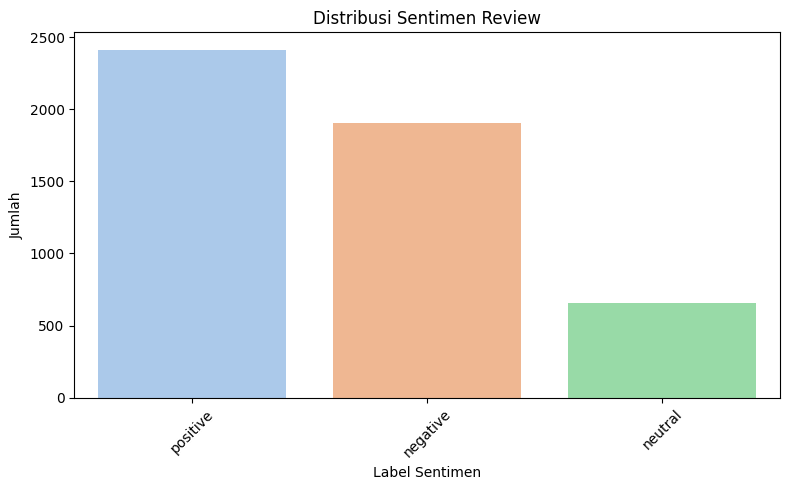

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_hanifnoerr', order=data['sentiment_result_hanifnoerr'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

crypter70

In [31]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = crypter70_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_crypter70'] = sentiments

In [32]:
print(data['sentiment_result_crypter70'].value_counts())

sentiment_result_crypter70
POSITIVE    2345
NEGATIVE    1793
NEUTRAL      834
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27756\3126681369.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')


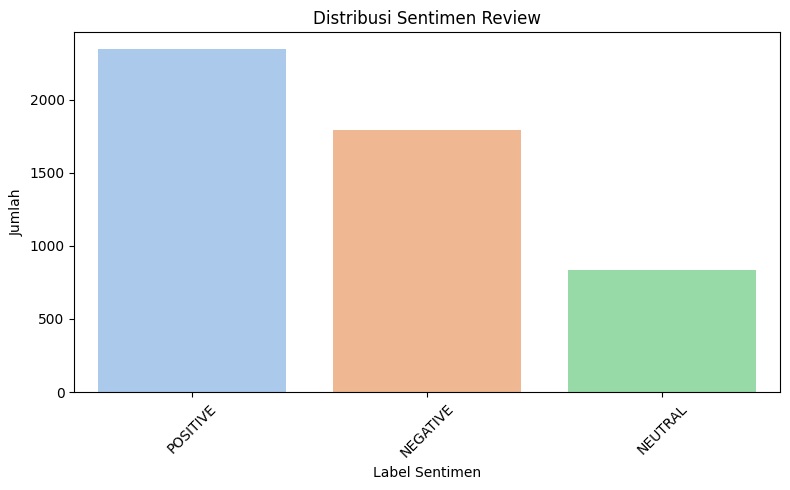

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_crypter70', order=data['sentiment_result_crypter70'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

w11wo

In [34]:
sentiments = []

for index, row in data.iterrows():
    try:
        if pd.isnull(row['review_text_cleaned']):
            text = str(' ')
        else:
            text = str(row['review_text_cleaned'])
        result = w11wo_model(text)[0]['label']
    except Exception as e:
        result = 'error'
    sentiments.append(result)

data['sentiment_result_w11wo'] = sentiments

In [35]:
print(data['sentiment_result_w11wo'].value_counts())

sentiment_result_w11wo
positive    2361
negative    1739
neutral      872
Name: count, dtype: int64


C:\Users\POS\AppData\Local\Temp\ipykernel_27756\392182998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')


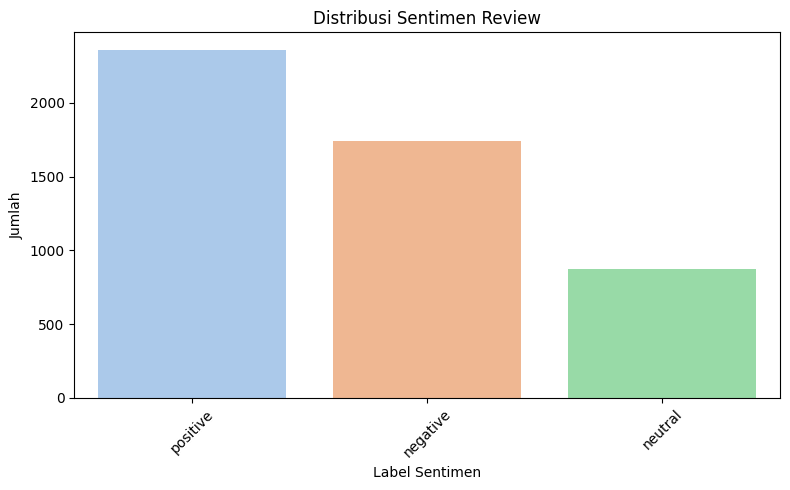

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_result_w11wo', order=data['sentiment_result_w11wo'].value_counts().index, palette='pastel')
plt.title('Distribusi Sentimen Review')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
data[data['name']=='titin hernawati']

,Table Name,name,Rating,Review Date,review_text,review_text_cleaned,sentiment_result_hanifnoerr,sentiment_result_crypter70,sentiment_result_w11wo
101,kcu_cirebon,titin hernawati,1.0,2018-05-01,Ayah,ayah,positive,POSITIVE,positive
